In [ ]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
import cupy as cp
import pack_cuda
pack_cuda._ensure_intialized()
import pack_cuda_lut
pack_cuda_lut._ensure_intialized()

local


<Axes: >

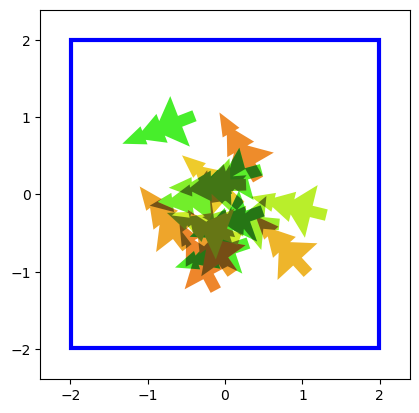

In [32]:
importlib.reload(kgs)
sol = kgs.SolutionCollectionSquare()
sol.xyt = 2*cp.random.default_rng(0).uniform(size=(1,15,3), dtype = kgs.dtype_cp)
sol.h = cp.array([[11000,0.,0.3]], dtype = kgs.dtype_cp)
sol.snap()
sol.check_constraints()
sol.h*=1.5
pack_vis_sol.pack_vis_sol(sol)

SolutionCollectionSquare(comment='', xyt=array([[[-0.78661203,  0.8654955 ,  1.9410179 ],
        [-0.57658947, -0.08252541,  1.666251  ],
        [ 0.30033728,  0.7115021 ,  0.5335129 ],
        [-0.11414884,  0.18856528,  0.8678699 ],
        [ 0.13613497,  0.48753244,  1.7793207 ],
        [-0.44690362, -1.10056   ,  0.44330394],
        [ 0.10526106, -0.8227689 ,  1.868603  ],
        [ 0.35908   , -0.22206555,  1.4551053 ],
        [-0.9515057 , -0.46883732,  0.6391251 ],
        [-0.15103488,  0.13200586,  1.5568837 ],
        [-0.22778769, -0.85029286,  0.66992307],
        [ 0.8861959 , -0.7621803 ,  0.73010194],
        [ 0.18022844, -0.4124278 ,  1.9126757 ],
        [-0.30070743, -0.415456  ,  1.2404397 ],
        [ 0.9624259 , -0.11019614,  1.3070426 ]]], dtype=float32), h=array([[3.9808574, 0.       , 0.       ]], dtype=float32), use_fixed_h=False, periodic=False)

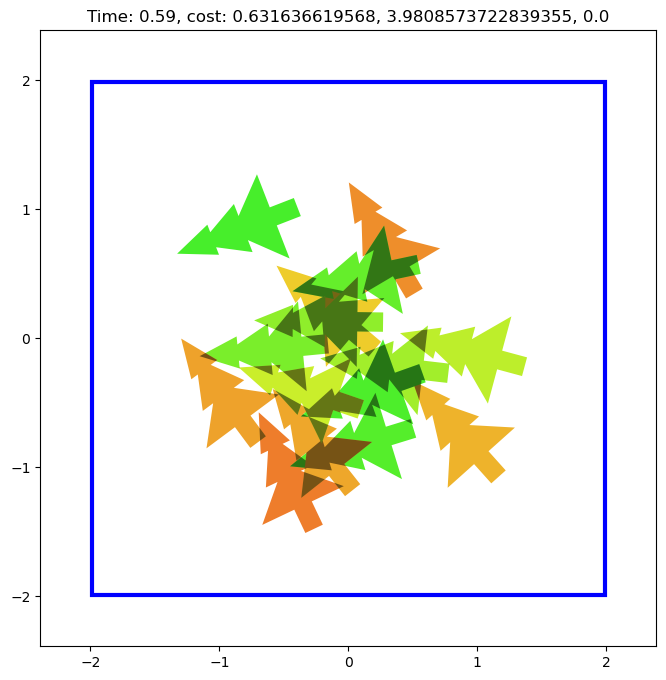

In [34]:
import pack_dynamics
optimizer = pack_dynamics.Optimizer()
optimizer.cost = optimizer.cost.costs[2]
optimizer.dt/=100
#optimizer.n_iterations *= 10
optimizer.plot_interval = 1e-2
optimizer.run_simulation(sol)

SolutionCollectionSquare(comment='', xyt=array([[[-0.78661203,  0.8654955 ,  1.9410179 ],
        [-0.40008816, -0.06389153,  1.7111673 ],
        [ 0.21727353,  0.5573247 ,  0.5228021 ],
        [-0.11741215,  0.12727612,  0.85898644],
        [ 0.06480807,  0.20877439,  1.8381399 ],
        [-0.31750178, -0.8655164 ,  0.49158755],
        [-0.09635711, -0.7604243 ,  1.8932747 ],
        [ 0.2825063 , -0.34781373,  1.4757113 ],
        [-0.7482195 , -0.35549003,  0.6580896 ],
        [-0.14847499,  0.10960275,  1.61011   ],
        [-0.1466949 , -0.6761601 ,  0.6113103 ],
        [ 0.78731114, -0.70531595,  0.74287355],
        [ 0.08982283, -0.35243857,  1.912436  ],
        [-0.20668721, -0.43653303,  1.2212106 ],
        [ 0.9007016 , -0.16709763,  1.3330933 ]]], dtype=float32), h=array([[3.9808574, 0.       , 0.       ]], dtype=float32), use_fixed_h=False, periodic=False)

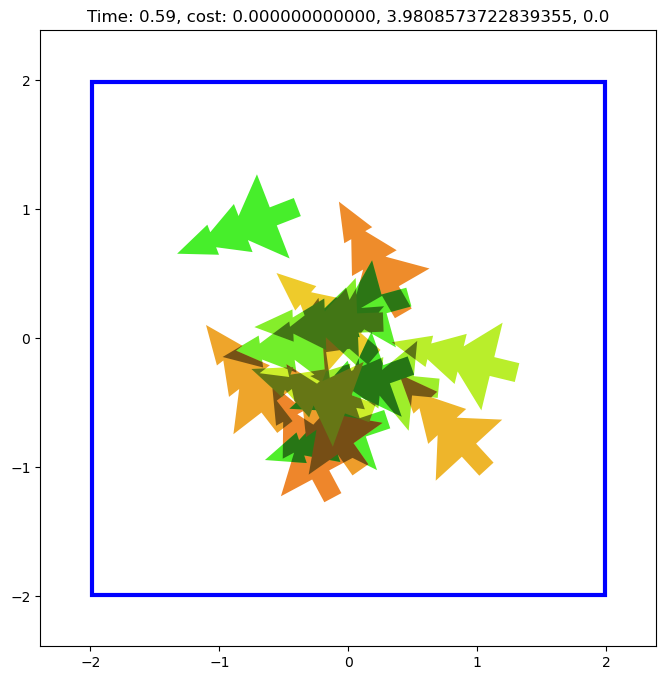

In [ ]:
import pack_dynamics
import pack_cost
optimizer = pack_dynamics.Optimizer()
optimizer.cost.costs[2] = pack_cost.CollisionCostExactSeparation(scaling=1., use_lookup_table=True,lut_N_x=200,lut_N_y=200,lut_N_theta=200)
optimizer.cost = optimizer.cost.costs[2]
optimizer.dt/=100
#optimizer.n_iterations *= 10
optimizer.plot_interval = 1e-2
optimizer.run_simulation(sol)

In [39]:
optimizer.cost.compute_cost_allocate(sol)

(array([0.], dtype=float32),
 array([[[ 0., -0., -0.],
         [ 0., -0.,  0.],
         [-0., -0.,  0.],
         [-0.,  0., -0.],
         [ 0., -0.,  0.],
         [ 0.,  0., -0.],
         [-0.,  0.,  0.],
         [-0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0., -0.,  0.],
         [ 0.,  0., -0.],
         [-0.,  0.,  0.],
         [-0., -0.,  0.],
         [ 0.,  0.,  0.],
         [-0., -0.,  0.]]], dtype=float32),
 array([[0., 0., 0.]], dtype=float32))